### 需要先去git clone 下方作者的資料及寫好的functions
##### https://github.com/oreilly-japan/deep-learning-from-scratch
###### dataset.mnist   common.functions import sigmoid , softmax  都是來自於這邊
###### PIL 是要額外 pip3 install Pillow

In [1]:
import sys, os
sys.path.append("/Users/francislin/Documents/Python_packages/deep-learning-from-scratch/")
from dataset.mnist import load_mnist

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from PIL import Image
import pickle
from common.functions import sigmoid , softmax

In [3]:
def img_show(img):
    pil_img=Image.fromarray(np.uint8(img))
    pil_img.show()

### 開始做TwoLayerNet看看

In [5]:
import numpy as np
from dataset.mnist import load_mnist
from ch04.two_layer_net import TwoLayerNet

In [6]:
(x_train , t_train) , (x_test , t_test) = load_mnist(normalize=True , one_hot_label=True)#one_hot_label會把資料變成[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.]的樣子
train_loss_list=[]

In [10]:
#超參數
iters_num=10000
train_size=x_train.shape[0] # x_train 全部
batch_size=100
learning_rate=0.1
network=TwoLayerNet(input_size=784 , hidden_size=50 , output_size=10) #784=28*28

t0=time.time()
for i in range(iters_num):
    #取得小批次
    batch_mask=np.random.choice(train_size , batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    #計算梯度
    #grad=network.numerical_gradient(x_batch , t_batch)
    grad = network.gradient(x_batch , t_batch) #高速版
    #更新參數
    for key in ('W1' , 'b1' , 'W2' , 'b2'):
        network.params[key] -= learning_rate*grad[key]
    #記錄學習過程
    loss=network.loss(x_batch , t_batch)
    train_loss_list.append(loss)
t1=time.time()
print (t1-t0,'秒')

16.723860025405884 秒


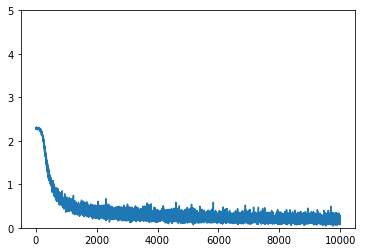

In [11]:
plt.ylim(0,5)
x=np.arange(len(train_loss_list))
y=np.array(train_loss_list)
plt.plot(x , y)
plt.show()

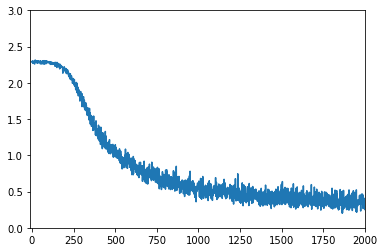

In [12]:
#聚焦放大y=0~3這段的變化
plt.ylim(0,3)
plt.xlim(-10,2000)
x=np.arange(len(train_loss_list))
y=np.array(train_loss_list)
plt.plot(x , y)
plt.show()

In [13]:
(x_train , t_train) , (x_test , t_test) = load_mnist(normalize=True , one_hot_label=True)
train_loss_list=[]
train_acc_list=[]
test_acc_list=[]

#超參數
iters_num=10000
train_size=x_train.shape[0]
batch_size=100
learning_rate=0.13

#每1 epoch的重複次數
iter_per_epoch=max(train_size/batch_size , 1)

network=TwoLayerNet(input_size=784 , hidden_size=50 , output_size=10)

for i in range(iters_num):
    #取得小批次
    batch_mask=np.random.choice(train_size , batch_size)
    x_batch=x_train[batch_mask]
    t_batch=t_train[batch_mask]
    #計算梯度
    grad = network.gradient(x_batch , t_batch)
    #更新參數
    for key in ('W1','b1','W2','b2'):
        network.params[key] -=learning_rate*grad[key]
    loss = network.loss(x_batch,t_batch)
    train_loss_list.append(loss)
    #計算1 epoch的辨識準確度
    if i % iter_per_epoch == 0:
        train_acc=network.accuracy(x_train , t_train)
        test_acc=network.accuracy(x_test , t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print ("train acc , test acc | " + str(train_acc) + " , " + str(test_acc))

train acc , test acc | 0.09863333333333334 , 0.0958
train acc , test acc | 0.8278833333333333 , 0.8325
train acc , test acc | 0.8897833333333334 , 0.8944
train acc , test acc | 0.9072333333333333 , 0.91
train acc , test acc | 0.9152166666666667 , 0.9176
train acc , test acc | 0.92145 , 0.9238
train acc , test acc | 0.9268666666666666 , 0.9286
train acc , test acc | 0.9304833333333333 , 0.933
train acc , test acc | 0.9355166666666667 , 0.9363
train acc , test acc | 0.93845 , 0.9375
train acc , test acc | 0.9413 , 0.9405
train acc , test acc | 0.9438666666666666 , 0.9416
train acc , test acc | 0.9465 , 0.9452
train acc , test acc | 0.9492166666666667 , 0.9478
train acc , test acc | 0.9504666666666667 , 0.9494
train acc , test acc | 0.95225 , 0.9499
train acc , test acc | 0.9538333333333333 , 0.9509


In [25]:
t_train[:4] #t_train 有將0~9展成one_hot_label，秀前四筆

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [18]:
(a_train , b_train), (a_test , b_test) = load_mnist(normalize=False, one_hot_label=False)

In [26]:
b_train[:4] #b_train 則為一般結果，秀前四筆

array([5, 0, 4, 1], dtype=uint8)

In [27]:
print ('第0筆的資料長這樣：' , b_test[0])
print ('第0筆，如果有one_hot_label就會是這樣：' , t_test[0])

第0筆的資料長這樣： 7
第0筆，如果有one_hot_label就會是這樣： [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


In [28]:
y0=np.argmax(network.predict(x_test[9999]))
print ('我們訓練出來的Neural Network預測出來是：' , y0)
print ('預測正確與否：',y0 == b_test[9999])

我們訓練出來的Neural Network預測出來是： 6
預測正確與否： True


### 做出每個預測錯誤的結果及其實際值

In [31]:
wrong_cases = 0

for i in range(len(x_test)):
    y=np.argmax(network.predict(x_test[i]))
    if y != b_test[i]:
        print('我們訓練出來的Neural Network對第%i個的預測出來是：'%(i) , y ,'but real is ', b_test[i])
        wrong_cases+=1
        
print('TTL: ',wrong_cases)

我們訓練出來的Neural Network對第8個的預測出來是： 6 but real is  5
我們訓練出來的Neural Network對第33個的預測出來是： 6 but real is  4
我們訓練出來的Neural Network對第124個的預測出來是： 4 but real is  7
我們訓練出來的Neural Network對第149個的預測出來是： 9 but real is  2
我們訓練出來的Neural Network對第233個的預測出來是： 7 but real is  8
我們訓練出來的Neural Network對第241個的預測出來是： 8 but real is  9
我們訓練出來的Neural Network對第247個的預測出來是： 2 but real is  4
我們訓練出來的Neural Network對第259個的預測出來是： 0 but real is  6
我們訓練出來的Neural Network對第300個的預測出來是： 6 but real is  4
我們訓練出來的Neural Network對第313個的預測出來是： 5 but real is  3
我們訓練出來的Neural Network對第320個的預測出來是： 1 but real is  9
我們訓練出來的Neural Network對第321個的預測出來是： 7 but real is  2
我們訓練出來的Neural Network對第340個的預測出來是： 3 but real is  5
我們訓練出來的Neural Network對第352個的預測出來是： 0 but real is  5
我們訓練出來的Neural Network對第362個的預測出來是： 7 but real is  2
我們訓練出來的Neural Network對第381個的預測出來是： 7 but real is  3
我們訓練出來的Neural Network對第389個的預測出來是： 4 but real is  9
我們訓練出來的Neural Network對第412個的預測出來是： 3 but real is  5
我們訓練出來的Neural Network對第445個的預測出來是： 0 but real is  6
我們訓練出來的Neural N

我們訓練出來的Neural Network對第4131個的預測出來是： 3 but real is  5
我們訓練出來的Neural Network對第4140個的預測出來是： 2 but real is  8
我們訓練出來的Neural Network對第4152個的預測出來是： 1 but real is  5
我們訓練出來的Neural Network對第4154個的預測出來是： 4 but real is  9
我們訓練出來的Neural Network對第4163個的預測出來是： 0 but real is  9
我們訓練出來的Neural Network對第4176個的預測出來是： 7 but real is  2
我們訓練出來的Neural Network對第4199個的預測出來是： 9 but real is  7
我們訓練出來的Neural Network對第4201個的預測出來是： 7 but real is  1
我們訓練出來的Neural Network對第4211個的預測出來是： 5 but real is  6
我們訓練出來的Neural Network對第4212個的預測出來是： 3 but real is  1
我們訓練出來的Neural Network對第4224個的預測出來是： 7 but real is  9
我們訓練出來的Neural Network對第4238個的預測出來是： 9 but real is  7
我們訓練出來的Neural Network對第4248個的預測出來是： 8 but real is  2
我們訓練出來的Neural Network對第4271個的預測出來是： 3 but real is  5
我們訓練出來的Neural Network對第4289個的預測出來是： 7 but real is  2
我們訓練出來的Neural Network對第4300個的預測出來是： 9 but real is  5
我們訓練出來的Neural Network對第4306個的預測出來是： 7 but real is  3
我們訓練出來的Neural Network對第4317個的預測出來是： 9 but real is  3
我們訓練出來的Neural Network對第4344個的預測出來是： 7 but real

In [41]:
#因為已經normalize，所以img_show看不出來是誰，所以需要將28*28的變成長度28的list，每個item又是長度28的list
img=a_test[0] #先令要看的img是第0個a_test
img=img.reshape(28,28)
print (img.shape)
img_show(img) #會跳出預覽程式看到圖片

(28, 28)


In [62]:
namespace = globals()
for i in range(10):
    namespace['counter_%d' %i] = 0

In [63]:
counter_0

0

In [64]:
for j in range(10):
    print(locals()['counter_%d' %j])

0
0
0
0
0
0
0
0
0
0


In [69]:
#製作計次器，i是實際結果、j是預測結果，counter_ij代表實際是i卻辨識為j的總次數
counter_dic = {}
for i in range(10):
    for j in range(10):
        counter_dic["counter_%s%s"% (str(i),str(j))] = 0

In [75]:
for A in range(len(x_test)):
    y=np.argmax(network.predict(x_test[A]))
    if y != b_test[A]:
        counter_dic["counter_%s%s"% (b_test[A],y)]+=1

In [77]:
counter_dic

{'counter_00': 0,
 'counter_01': 0,
 'counter_02': 2,
 'counter_03': 1,
 'counter_04': 0,
 'counter_05': 4,
 'counter_06': 7,
 'counter_07': 1,
 'counter_08': 2,
 'counter_09': 0,
 'counter_10': 0,
 'counter_11': 0,
 'counter_12': 2,
 'counter_13': 2,
 'counter_14': 0,
 'counter_15': 1,
 'counter_16': 3,
 'counter_17': 2,
 'counter_18': 6,
 'counter_19': 0,
 'counter_20': 8,
 'counter_21': 2,
 'counter_22': 0,
 'counter_23': 5,
 'counter_24': 6,
 'counter_25': 3,
 'counter_26': 8,
 'counter_27': 8,
 'counter_28': 8,
 'counter_29': 2,
 'counter_30': 0,
 'counter_31': 1,
 'counter_32': 13,
 'counter_33': 0,
 'counter_34': 0,
 'counter_35': 11,
 'counter_36': 1,
 'counter_37': 8,
 'counter_38': 8,
 'counter_39': 6,
 'counter_40': 1,
 'counter_41': 1,
 'counter_42': 5,
 'counter_43': 0,
 'counter_44': 0,
 'counter_45': 0,
 'counter_46': 9,
 'counter_47': 3,
 'counter_48': 2,
 'counter_49': 27,
 'counter_50': 7,
 'counter_51': 1,
 'counter_52': 0,
 'counter_53': 22,
 'counter_54': 4,
 'coun